In [466]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.rcParams['figure.figsize'] = (15, 10)

In [316]:
def quadratic_func(x):
    return -0.005* np.square(x) - 4

def fit(x, y, deg):
    coeffs = np.polyfit(x, y, deg)
    x_new = np.linspace(x[0], x[-1])
    ffit = np.poly1d(coeffs)
    y_new = ffit(x_new)
    return x_new, y_new

In [317]:
#x = np.array([-0.15,-0.05, -0.047, -0.05,0.065,0.062, 0.063])
x = np.array([-0.05, -0.009, -0.001, -0.005, 0.011, 0.0395, 0.04, 0.041])
y = quadratic_func(x)

x1, y1 = fit(x, y, 1)
x2, y2 = fit(x, y, 2)
x3, y3 = fit(x, y, 9)

//anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


### Part A

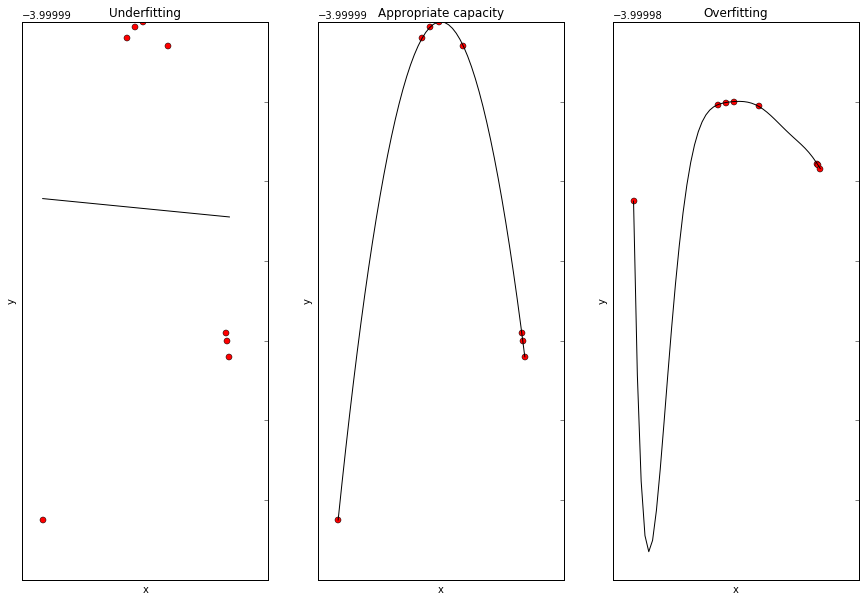

In [318]:
plt.figure(1)
plt.subplot(131)
plt.plot(x, y, 'ro', x1, y1, '-k')
plt.title('Underfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')

plt.subplot(132)
plt.plot(x, y, 'ro', x2, y2, '-k')
plt.title('Appropriate capacity')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')

plt.subplot(133)
plt.plot(x, y, 'ro', x3, y3, '-k')
plt.title('Overfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
plt.show()

### Part B

In [492]:
def fit_weight_decay(x, y, deg, alpha):
    X = x.reshape(-1,1)
    model = make_pipeline(PolynomialFeatures(deg), Ridge(alpha=alpha, normalize=True, solver='lsqr'))
    model.fit(X, y)
    x_new = np.linspace(x[0], x[-1]).reshape(-1, 1)
    y_new = model.predict(x_new)
    return x_new, y_new

In [493]:
x1, y1 = fit_weight_decay(x, y, 9, 10**2)
x2, y2 = fit_weight_decay(x, y, 9, 10**-1)
x3, y3 = fit_weight_decay(x, y, 9, 10**-10)

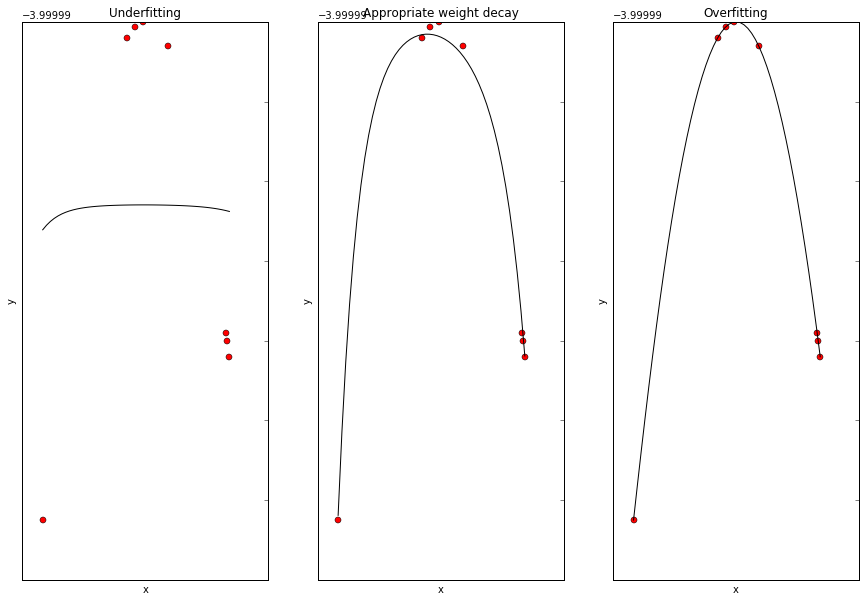

In [494]:
plt.figure(2)
plt.subplot(131)
plt.plot(x, y, 'ro', x1, y1, '-k')
plt.title('Underfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')

plt.subplot(132)
plt.plot(x, y, 'ro', x2, y2, '-k')
plt.title('Appropriate weight decay')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')

plt.subplot(133)
plt.plot(x, y, 'ro', x3, y3, '-k')
plt.title('Overfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
plt.show()